In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Lambda
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model

2025-05-08 03:47:13.921014: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-08 03:47:13.921498: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-08 03:47:13.924684: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-08 03:47:13.934017: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746654433.949917   22620 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746654433.95

In [2]:
# Load test data
df = pd.read_csv('custom.csv')

In [6]:
x=df.drop(['label'], axis=1)

In [7]:
model=load_model('small.h5')

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         8,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │         2,056 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,785 (46.04 KB)

 Trainable params: 11,272 (44.03 KB)

 Non-trainable params: 512 (2.00 KB)

 Optimizer params: 1 (8.00 B)

In [9]:
# Make predictions on the test set
pred_probs = model.predict(x)

# Get the predicted class labels
y_pred = np.argmax(pred_probs, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


In [10]:
y_pred

array([2, 3, 4, 1, 7, 2, 7, 0, 0, 2, 5, 1, 7])

In [12]:
df['label']

0     2
1     3
2     4
3     1
4     7
5     2
6     7
7     0
8     0
9     2
10    5
11    1
12    7
Name: label, dtype: int64

In [11]:
pred_probs

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.03363057e-02, 9.79663670e-01, 0.00000000e+00, 0.00000000e+00],
       [1.44022405e-32, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.29584238e-04, 9.99870420e-01, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        3.51230506e-06, 9.99996543e-01, 0.00000000e+00, 0.00000000e+00],
       [6.58703156e-38, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        3.23946262e-03, 9.96760547e-01, 0.00000000e+00, 0.00000000e+00],
       [2.49697738e-38, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 5.64882402e-26, 1.79298016e-35, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 1.36023791e-22, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 6.27725589e-23, 0.00000000e+00, 0.

In [6]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8235


In [7]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.79      0.83        66
           1       0.85      0.84      0.85        69
           2       0.75      0.79      0.77        85
           3       0.74      0.70      0.72        50
           4       0.75      0.73      0.74        70
           5       0.80      0.83      0.82        64
           6       0.98      0.96      0.97        84
           7       0.81      0.89      0.85        73

    accuracy                           0.82       561
   macro avg       0.82      0.82      0.82       561
weighted avg       0.82      0.82      0.82       561



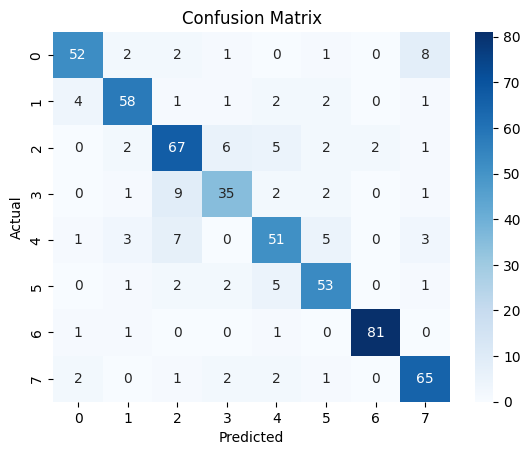

In [8]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()